Statements versus Expressions
================

**Statement** is a **Prove-It** class.  **Statement**s wrap **Expression**s.  **Statement**s are responsible for storing and maintaining proof information relevant to that **Expression**.  Any **Expression** may be wrapped as a **Statement** with no guarantee that the **Expression** is truth-apt.  **Prove-It**, in its core, is agnostic to intrinsic truth-aptness of **Expression**s except when a **Statement** is able to be proven.  The `proveit.logic` package defines the Boolean concept which may be used for making statements of the form $A \in \mathbb{B}$ (where $\mathbb{B}$ represents the Boolean set of true or false), but this is outside **Prove-It**'s core.  As far as the core is concerned, a **Statement** is either proven or not; if it is not proven, it may or may not be truth-apt.

When an **Expression** is wrapped by a corresponding **Statement**, it is in a one-to-one correspondence.  For most practical purposes, working with a **Statement** object is the same as working with its corresponding **Expression** object.  Using Python tricks (specifically, overloading the `__getattr__` and `__dir__` methods), the **Statement** behaves in most ways as if it were the **Expression** it is wrapping.  Conversely, an **Expression** will generate and/or access its corresponding **Statement** as needed.

The purpose of working with a **Statement** object is in the way that it is displayed.  When the **Statement** has been proven, under some set of assumptions (or no assumptions), the **Statement** is displayed in a way that portrays this information.  If the **Statement** has not been proven (within the Python session's memory), the normal **Expression** display will be shown.  If it has been proven most recently under some set of assumptions, ${\cal A}$, it is display in the form ${\cal A} \boldsymbol{\vdash} S$, where $S$ is the **Statement**/**Expression**.  This bolded single turnstyle $\boldsymbol{\vdash}$ is **Prove-It**'s indication that the **Statement** on the right is derivable from the assumptions on the left.  If one wishes to make **Prove-It** **Expression**s that use this $\vdash$ operator symbol, it can be left un-bolded to distinguish it from $\boldsymbol{\vdash}$.

In [1]:
# For example,
from proveit.common import fx
fxStatement = fx.proven(assumptions={fx})
fxStatement

The `proven` method attempts to prove the **Statement** (corresponding to the **Expression**) under the given set of assumptions and returns the **Statement** object if it is successful.  In this case, $f(x)$ is trivially true if we use $f(x)$ as an assumption.  Again, **Prove-It** is agnostic to whether or not $f(x)$ is truth-apt.  This simply says that if $f(x)$ is assumped to be a true statement, then $f(x)$ is a true statement.  If `proven` is not successful, it raises a `ProofFailure` exception.

In [2]:
from proveit import ProofFailure
try:
    fx.proven()
except ProofFailure as e:
    print "EXPECTED ERROR: ", e

EXPECTED ERROR:  Proof failed: f( x ) assuming {}


To obtain the **Expression** from the **Statement**, and be able to display it as the **Expression** only, call the `expr` method:

In [3]:
fxStatement.expr()

But note that we may use the **Statement** object as if it were the **Expression** object for most practical purposes.  It aquires all of the **Expression**'s attributes, except for some that it has overridden (such as `__class__`, `latex`, and `string`).

In [4]:
print dir(fxStatement)

['__doc__', '__eq__', '__hash__', '__init__', '__module__', '__ne__', '__repr__', '__str__', '_conclusionOfImplication', '_config_latex_tool', '_coreInfo', '_expression', '_generalizations', '_generalizers', '_hypothesisOfImplication', '_implicationsOfHypothesis', '_implicators', '_isAxiom', '_isNamedTheorem', '_latestProvingAssumptions', '_name', '_package', '_proofNumber', '_prover', '_repr_png_', '_restrictionChecked', '_specializations', '_specialize_or_relabel', '_specializers', '_subExpressions', '_unique_id', '_unique_rep', '_validateRelabelMap', 'beginProof', 'exprInfo', 'expr_to_prove', 'formatted', 'freeMultiVars', 'freeVars', 'generalize', 'isProven', 'latex', 'make', 'operands', 'operator', 'operatorOfOperation', 'png', 'prove', 'proveByEval', 'proven', 'qed', 'relabel', 'relabeled', 'safeDummyVar', 'safeDummyVars', 'specialize', 'statement', 'string', 'subExprGen', 'substituted', 'unique_id_map', 'usedVars', 'wasProven']


In [5]:
fxStatement.operands

In [6]:
fxStatement.__class__

<class proveit._core_.statement.Statement at 0x1078d81f0>

In the next three tutorial notebooks, we will be examining the different kinds of derivation steps for making proofs and we will see more examples of proven **Statements**.

More things to perhaps discuss here:
====================
* default assumptions,
* png storage,
* **displaying proofs**

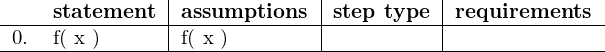

In [7]:
fxStatement.proof()